In [ ]:
from pymongo import MongoClient

client = MongoClient("localhost", 27017)
gobDb = client["GoBDB"]
jobCollection = gobDb["Jobs"]

categories = jobCollection.find({}, {'attributes.category_name': 1})

#print(list(categories))

In [ ]:
from pymongo import MongoClient

client = MongoClient("localhost", 27017)
gobDb = client["GoBDB"]
jobCollection = gobDb["Jobs"]

categories = jobCollection.aggregate([
    {
        '$project': {'category': '$attributes.category_name'}
    }
])

listCategories=[*categories]

In [68]:
from pymongo import MongoClient
import pandas as pd 
import matplotlib.pyplot as plt
from collections import Counter

In [3]:

client = MongoClient("localhost", 27017)
gobDb = client["GoBDB"]
jobCollection = gobDb["Jobs"]

categories = jobCollection.aggregate([
    {
        '$project': {
            'category': '$attributes.category_name',
            'title': '$attributes.title',
            'tags': '$attributes.tags.data'
        }
    }
])

listCategories=[*categories]

In [19]:
listCategories[0]['tags'][0]['attributes']['name']

'Agile'

In [31]:
listCategories[0]

{'_id': ObjectId('61b7a04c9643f5d286bf8aa2'),
 'category': 'Programming',
 'title': 'Analista Programador',
 'tags': [{'id': 'agile',
   'type': 'tag',
   'attributes': {'name': 'Agile',
    'keywords': 'Scrum, XP, Kanban, Scrumban, Pair programming, Kiuwan, Fortify, ágiles, agiles, Agiles'},
   'relationships': {}},
  {'id': 'api',
   'type': 'tag',
   'attributes': {'name': 'API',
    'keywords': 'Retrofit, REST, GraphQL, SOAP, XML-RPC'},
   'relationships': {}},
  {'id': 'back-end',
   'type': 'tag',
   'attributes': {'name': 'Back-end',
    'keywords': 'Java, Python, Node, NodeJS, Node.js, Ruby, C, Golang, PHP, Scala, Laravel, Rails, Django, Elixir, Phoenix, C#, C++, .NET, ASP, backend, Symfony, Clojure, Erlang, Express, ExpressJS, Express.js, Grails, Groovy, JEE, J2EE, RoR, Sinatra'},
   'relationships': {}},
  {'id': 'net',
   'type': 'tag',
   'attributes': {'name': '.Net',
    'keywords': 'Hibernate.NET, NancyFX, Mono, NuGet, Net Framework'},
   'relationships': {}},
  {'id': '

In [28]:
for info in listCategories[0]['tags']:
    print(info['attributes']['name'])

Agile
API
Back-end
.Net
Oracle


In [64]:
dict_new={}
for categoria in listCategories:
    dict_new[categoria['category']]=[]

In [65]:
dict_new

{'Programming': [],
 'Operations / Admin': [],
 'Customer Support': [],
 'SysAdmin / DevOps / QA': [],
 'Digital Marketing': [],
 'Sales': [],
 'Design / UX': [],
 'People & HR': [],
 'Mobile Development': [],
 'Product, Innovation & Agile': [],
 'Data Science / Analytics': [],
 'Cybersecurity': [],
 'Content, Advertising & Media': [],
 'Machine Learning & AI': [],
 'Hardware / Electronics': []}

In [66]:
for category in listCategories:
    dict_new[category['category']]+=[info['attributes']['name'] for info in category['tags']]

In [78]:
b=dict(Counter(dict_new['Programming']))

In [98]:
c=pd.DataFrame([b], index=['Count'])

In [104]:
c.transpose().sort_values('Count',ascending= False).head(20)

,Count
Back-end,7868
JavaScript,6011
Front-end,3945
Git,3253
Full-stack,3138
React,3093
English,2879
Node.js,2743
CSS,2598
API,2529


In [61]:
listCategories

[{'_id': ObjectId('61b7a04c9643f5d286bf8aa2'),
  'category': 'Programming',
  'title': 'Analista Programador',
  'tags': [{'id': 'agile',
    'type': 'tag',
    'attributes': {'name': 'Agile',
     'keywords': 'Scrum, XP, Kanban, Scrumban, Pair programming, Kiuwan, Fortify, ágiles, agiles, Agiles'},
    'relationships': {}},
   {'id': 'api',
    'type': 'tag',
    'attributes': {'name': 'API',
     'keywords': 'Retrofit, REST, GraphQL, SOAP, XML-RPC'},
    'relationships': {}},
   {'id': 'back-end',
    'type': 'tag',
    'attributes': {'name': 'Back-end',
     'keywords': 'Java, Python, Node, NodeJS, Node.js, Ruby, C, Golang, PHP, Scala, Laravel, Rails, Django, Elixir, Phoenix, C#, C++, .NET, ASP, backend, Symfony, Clojure, Erlang, Express, ExpressJS, Express.js, Grails, Groovy, JEE, J2EE, RoR, Sinatra'},
    'relationships': {}},
   {'id': 'net',
    'type': 'tag',
    'attributes': {'name': '.Net',
     'keywords': 'Hibernate.NET, NancyFX, Mono, NuGet, Net Framework'},
    'relation

In [43]:
[1,2]+[4,5]

[1, 2, 4, 5]

In [42]:
dict_new

{'Programming': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'Operations / Admin': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'Customer Support': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'SysAdmin / DevOps / QA': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'Digital Marketing': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'Sales': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'Design / UX': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'People & HR': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'Mobile Development': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'Product, Innovation & Agile': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'Data Science / Analytics': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'Cybersecurity': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'Content, Advertising & Media': ['Agile',
  'API',
  'Back-end',
  '.Net',
  'Oracle'],
 'Machine Learning & AI': ['Agile', 'API', 'Back-end', '.Net', 'Oracle'],
 'Hardwa

In [4]:
df=pd.DataFrame(listCategories)

In [5]:
df.head(20)

,_id,category,title,tags
0,61b7a04c9643f5d286bf8aa2,Programming,Analista Programador,"[{'id': 'agile', 'type': 'tag', 'attributes': ..."
1,61b7a04c9643f5d286bf8aa4,Operations / Admin,Project Manager,"[{'id': 'agile', 'type': 'tag', 'attributes': ..."
2,61b7a04c9643f5d286bf8aa5,Customer Support,Consultor Mejoras Continuas,"[{'id': 'crm', 'type': 'tag', 'attributes': {'..."
3,61b7a04c9643f5d286bf8aa3,SysAdmin / DevOps / QA,Analista Programador (AWS),"[{'id': 'amazon-web-services', 'type': 'tag', ..."
4,61b7a0719643f5d286bf8aa8,Programming,Desarrollador Full-Stack,"[{'id': 'front-end', 'type': 'tag', 'attribute..."
5,61b7a0759643f5d286bf8aaa,Programming,Front-end Developer (Angular),"[{'id': 'angularjs', 'type': 'tag', 'attribute..."
6,61b7a0759643f5d286bf8aab,Programming,Full-Stack Developer (Netcore),"[{'id': 'back-end', 'type': 'tag', 'attributes..."
7,61b7a04c9643f5d286bf8aa7,Customer Support,Consultor CX,"[{'id': 'back-end', 'type': 'tag', 'attributes..."
8,61b7a0729643f5d286bf8aa9,Programming,Ingeniero(a) de Software,"[{'id': 'back-end', 'type': 'tag', 'attributes..."
9,61b7a0779643f5d286bf8aac,Programming,👩🏽‍💻👨🏽‍🎤 Lead/Sr Architect (Hands on),"[{'id': 'api', 'type': 'tag', 'attributes': {'..."


In [107]:
df['tags'][0]

[{'id': 'agile',
  'type': 'tag',
  'attributes': {'name': 'Agile',
   'keywords': 'Scrum, XP, Kanban, Scrumban, Pair programming, Kiuwan, Fortify, ágiles, agiles, Agiles'},
  'relationships': {}},
 {'id': 'api',
  'type': 'tag',
  'attributes': {'name': 'API',
   'keywords': 'Retrofit, REST, GraphQL, SOAP, XML-RPC'},
  'relationships': {}},
 {'id': 'back-end',
  'type': 'tag',
  'attributes': {'name': 'Back-end',
   'keywords': 'Java, Python, Node, NodeJS, Node.js, Ruby, C, Golang, PHP, Scala, Laravel, Rails, Django, Elixir, Phoenix, C#, C++, .NET, ASP, backend, Symfony, Clojure, Erlang, Express, ExpressJS, Express.js, Grails, Groovy, JEE, J2EE, RoR, Sinatra'},
  'relationships': {}},
 {'id': 'net',
  'type': 'tag',
  'attributes': {'name': '.Net',
   'keywords': 'Hibernate.NET, NancyFX, Mono, NuGet, Net Framework'},
  'relationships': {}},
 {'id': 'oracle',
  'type': 'tag',
  'attributes': {'name': 'Oracle', 'keywords': 'Siebel'},
  'relationships': {}}]

In [105]:
df.dtypes

_id         object
category    object
title       object
tags        object
dtype: object

In [6]:
#df[df['descripcion'].fillna('').str.contains('estacionamiento'and'venta',case=False)]

In [128]:
pd.Series(df[df['category'].isin(['Programming'])]['title'].unique()).str.contains('full-stack',case=False).sum()

0                         Analista Programador
1                     Desarrollador Full-Stack
2                Front-end Developer (Angular)
3               Full-Stack Developer (Netcore)
4                     Ingeniero(a) de Software
5        👩🏽‍💻👨🏽‍🎤 Lead/Sr Architect (Hands on)
6                        Senior React Engineer
7               Data Engineer Technical Leader
8                      Semi Senior JS Engineer
9                  Developer React and Node.js
10                Python Developer Semi Senior
11                            Testing Engineer
12                 Angular Front-end Developer
13                      📡 Remote PHP Developer
14                 Product Validation Engineer
15                     Application Engineer Sr
16                           Node.js Developer
17                     Full-Stack Developer ⚙️
18          Front-end Engineer for USA Project
19       Full-Stack Jr Web Dev for USA Project
20                     Senior Node.js Engineer
21           

In [8]:
pd.Series(df[df['category'].isin(['Programming'])]['title'].unique()).str.contains('Full-Stack',case=False)  

0      False
1       True
2      False
3       True
4      False
       ...  
342    False
343    False
344     True
345    False
346    False
Length: 347, dtype: bool

In [9]:
df['title'].unique()

array(['Analista Programador', 'Project Manager',
       'Consultor Mejoras Continuas', 'Analista Programador (AWS)',
       'Desarrollador Full-Stack', 'Front-end Developer (Angular)',
       'Full-Stack Developer (Netcore)', 'Consultor CX',
       'Ingeniero(a) de Software',
       '👩🏽\u200d💻👨🏽\u200d🎤 Lead/Sr Architect (Hands on)',
       'QA Automatización', 'Senior React Engineer',
       'Mid/Senior AWS DevOps Engineer', 'Remote Automation QA Engineer',
       'Expert AWS DevOps Engineer', 'Remote Marketing Manager',
       'Data Engineer Technical Leader',
       'Remote Marketing Sales Specialist', 'Semi Senior JS Engineer',
       'Remote UX/UI Designer', 'Remote Technical Resources Specialist',
       'Developer React and Node.js',
       'Mid Azure DevOps Engineer (Remote)',
       'Python Developer Semi Senior', 'Senior/Expert DevOps Engineer',
       'Testing Engineer', 'Senior Azure DevOps Engineer (Remote)',
       'Customer Success Executive',
       'Remote Recruitment 

<AxesSubplot:xlabel='category'>

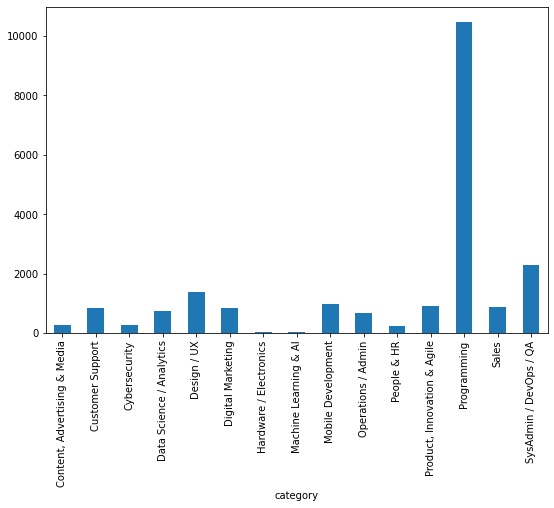

In [10]:
plt.figure(figsize=(9,6))
df.groupby('category').count()['_id'].plot.bar()

In [11]:
df_new=df.groupby('category').count()['_id'].reset_index()


In [13]:
#df_new['_id'].astype(int)

category    object
_id          int64
dtype: object

In [14]:
df_new.to_csv('prueba.csv',index=False)

In [15]:
l=df.groupby('category').count()['_id'].tolist()
#l.pop(12)

10462

In [30]:
a=df.groupby('category').count()['_id']/100

In [31]:
dict_=a.to_dict()

In [32]:
area=list(dict_.keys())
area.pop(12)
area

['Content, Advertising & Media',
 'Customer Support',
 'Cybersecurity',
 'Data Science / Analytics',
 'Design / UX',
 'Digital Marketing',
 'Hardware / Electronics',
 'Machine Learning & AI',
 'Mobile Development',
 'Operations / Admin',
 'People & HR',
 'Product, Innovation & Agile',
 'Sales',
 'SysAdmin / DevOps / QA']

In [25]:
[*range(13)]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [33]:
count_area=list(dict_.values())
count_area.pop(12)

104.62

In [34]:
import plotly.graph_objects as px 
import numpy as np 
  
  
np.random.seed(42) 
  
random_x= area
random_y= l
  
plot = px.Figure(data=[px.Scatter( 
    x = random_x, 
    y = random_y, 
    mode = 'markers', 
    marker_size = count_area) 
]) 
                   
plot.show()

In [ ]:
np.random.randint(1,12000,100)

In [ ]:
df.groupby('title').bar()

In [ ]:
import plotly.express as px

fig =px.scatter(x=range(10), y=range(10))
fig.write_html("file.html")

In [ ]:
wide_df = px.data.medals_wide()
wide_df.head()

In [109]:
import plotly
import plotly.graph_objs as go
import numpy as np
import math #needed for definition of pi

xpoints = np.arange(0, math.pi*2, 0.05)
ypoints = np.sin(xpoints)
trace0 = go.Scatter(
   x = xpoints, y = ypoints
)
data = [trace0]

plotly.offline.plot(
   { "data": data,"layout": go.Layout(title = "hello world")}, auto_open = True)

'temp-plot.html'

In [110]:
plotly.offline.plot(
   { "data": data,"layout": go.Layout(title = "hello world")}, auto_open = True,include_plotlyjs=False, output_type='div')

'<div>                            <div id="00a95c00-1a53-4850-a684-f9be21da7c54" class="plotly-graph-div" style="height:100%; width:100%;"></div>            <script type="text/javascript">                                    window.PLOTLYENV=window.PLOTLYENV || {};                                    if (document.getElementById("00a95c00-1a53-4850-a684-f9be21da7c54")) {                    Plotly.newPlot(                        "00a95c00-1a53-4850-a684-f9be21da7c54",                        [{"type": "scatter", "x": [0.0, 0.05, 0.1, 0.15000000000000002, 0.2, 0.25, 0.30000000000000004, 0.35000000000000003, 0.4, 0.45, 0.5, 0.55, 0.6000000000000001, 0.65, 0.7000000000000001, 0.75, 0.8, 0.8500000000000001, 0.9, 0.9500000000000001, 1.0, 1.05, 1.1, 1.1500000000000001, 1.2000000000000002, 1.25, 1.3, 1.35, 1.4000000000000001, 1.4500000000000002, 1.5, 1.55, 1.6, 1.6500000000000001, 1.7000000000000002, 1.75, 1.8, 1.85, 1.9000000000000001, 1.9500000000000002, 2.0, 2.0500000000000003, 2.1, 2.15, 2.2, 

In [ ]:
import plotly.graph_objects as go
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure([go.Bar(x=animals, y=[20, 14, 23])])
fig.show()

In [ ]:
 include_plotlyjs=False, output_type='div'
import plotly
plotly.offline.plot(wide_df, include_plotlyjs=False, output_type='div')